In [ ]:
# for google colab
%tensorflow_version 2.x

# 이미지 분류를 위한 CNN : Convolution Neural Network

#### NumPy Array Image만들기

(120, 120)
(120, 120, 3)


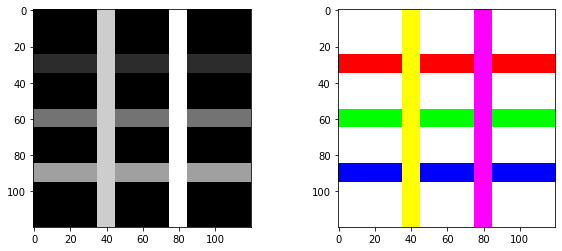

In [10]:
import numpy as np
import matplotlib.pyplot as plt

gray = np.zeros((120,120), dtype=np.uint8)   # 120x120 2차원 배열 생성, 검은색 흑백 이미지
gray[25:35, :] = 45                          # 25~35행 모든 열에 45 할당 
gray[55:65, :] = 115                         # 55~65행 모든 열에 115 할당 
gray[85:95, :] = 160                         # 85~95행 모든 열에 160 할당 
gray[:, 35:45] = 205                         # 모든행 35~45 열에 205 할당 
gray[:, 75:85] = 255      
print(gray.shape)

rgb = np.full((120,120, 3), fill_value=(255,255,255), dtype=np.uint8)    # 120x120 2차원 배열 생성, 3채널 컬러 이미지
rgb[25:35, :] = [255,0,0]                       # 25~35행 모든 열에 [255,0,0], 빨강색 할당 
rgb[55:65, :] = [0, 255, 0]                     # 55~65행 모든 열에 [0,255,0], 초록색 할당 
rgb[85:95, :] = [0,0,255]                       # 85~95행 모든 열에 [0,0,255], 파랑색 할당 
rgb[:, 35:45] = [255,255,0]                     # 모든행 35~45 열에 [255,255,0], 하늘색 할당 
rgb[:, 75:85] = [255,0,255]      
print(rgb.shape)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(rgb)
plt.show()

### Convolution 연산 실습

input img: 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
input shape: (1, 3, 3, 1)
fillter:(2, 2, 1, 1) 
[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
filltered:
 [[[[ 8.]
   [12.]]

  [[20.]
   [24.]]]]
out : [[ 8. 12.]
 [20. 24.]]


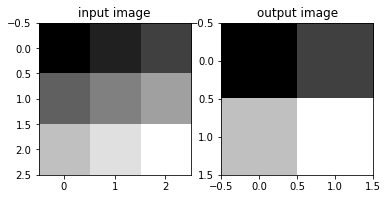

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

img = np.arange(9).reshape(3,3)
print(f'input img: \n {img}')
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('input image')

x = np.float32(img.reshape(1,3,3,1))
print(f'input shape: {x.shape}')

filter = np.ones((2,2,1,1), dtype=np.float32) # 2x2 window, 1:in, 1:out
print(f'fillter:{filter.shape} \n{filter}')

stride = 1
fillterd = tf.nn.conv2d(x, filter, stride, padding='VALID')#SAME
print(f'filltered:\n {fillterd}')

out = fillterd.numpy().reshape(2,2)
print(f'out : {out}')

plt.subplot(1,2,2)
plt.imshow(out, cmap='gray')
plt.title('output image')
plt.show()

### ### Convolution 연산 실습2 (엣지 검출)

Text(0.5, 1.0, 'gx + gy')

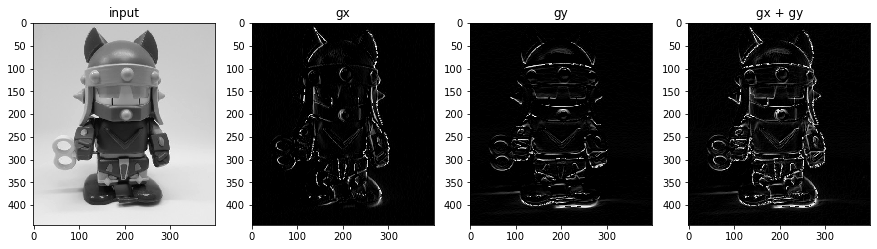

In [7]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../img/tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

# x 방향 미분 커널
gx_k = np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]])
gx_k = gx_k.reshape((3,3,1,1))

# y 방향 미분 커널
gy_k = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]])
gy_k = gy_k.reshape((3,3,1,1))

gx = tf.nn.conv2d(x, gx_k, [1,1,1,1], padding='SAME')
gx = gx.numpy()
gx[gx < 0 ] = 0  #음수 처리
gx = gx.reshape(h,w).astype(np.uint8)

gy = tf.nn.conv2d(x, gy_k, [1,1,1,1], padding='SAME')
gy = gy.numpy()
gy[gy < 0 ] = 0  #음수 처리
gy = gy.reshape(h,w).astype(np.uint8)

# 결과 출력
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.title("input")
plt.subplot(142)
plt.imshow(gx, cmap='gray')
plt.title("gx")
plt.subplot(143)
plt.imshow(gy, cmap='gray')
plt.title("gy")
plt.subplot(144)
plt.imshow(gx + gy, cmap='gray')
plt.title("gx + gy")

#### Pooling을 이용한 특징 축소 사례
<video controls="controls" src="./assets/Top_breeder.mp4" width=640 height=480></video>
* 출처 : https://www.youtube.com/watch?v=f1fXCRtSUWU

#### Pooling을 이용한 특징 축소 사례 2
<video controls="controls" src="./assets/Avatar.mp4" width=640 height=480></video>
* 출처 :https://www.youtube.com/watch?v=U1KiC0AXhHg

## TF Max Pool

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[[[4.]
   [5.]]

  [[7.]
   [8.]]]]


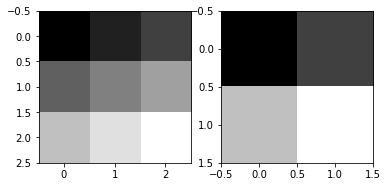

In [8]:
img = np.arange(9, dtype=np.float32).reshape(3,3)
print(img)
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

x = img.reshape(1,3,3,1)
ksize = 2 # [2,2] or [1,2,2,1]
strides = 1 # [1,1] or [1,1,1,1]

pool = tf.nn.max_pool(x, ksize=ksize, strides=strides, padding='VALID')
pooled = pool.numpy()
print(pooled)
plt.subplot(1,2,2)
plt.imshow(pooled.reshape(2,2), cmap='gray')
plt.show()

## MaxPool을 이용한 특징 검출

(1, 444, 400, 1)
(1, 44, 40, 1)


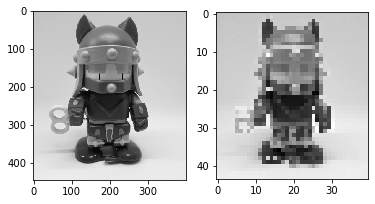

In [9]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('../img/tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape[:2]

x = np.float32(img.reshape(1,h,w,1))
print(x.shape)

pooled = tf.nn.max_pool(x, ksize=[1,5,5,1], strides=[1,10,10,1], padding='VALID')
pooled = pooled.numpy()
print(pooled.shape)
pooled = pooled.squeeze()

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(pooled, cmap='gray')

## MNIST 숫자 손글씨 인식

In [1]:
import tensorflow as tf
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2, 2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu ), 
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 76us/s

### LeNet-5을 이용한 MNIST

In [40]:
import tensorflow as tf
import numpy as np

def make_LeNet(input_shape=(32, 32,1), output=10):
    padding = 'valid'
    if input_shape[0] < 32:
        padding = 'same'
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(6, 5, padding=padding, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(16, 5, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(120, 5, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(84, activation='relu' ), 
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(output, activation='softmax')
    ])
    return model

model = make_LeNet()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = make_LeNet(input_shape=(28,28,1))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 51us/sample - loss: 0.3708 - accuracy: 0.8845 - val_loss: 0.0842 - val_accuracy: 0.9750
Epoch 2/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.1017 - accuracy: 0.9703 - val_loss: 0.0644 - val_accuracy: 0.9788
Epoch 3/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.0722 - accuracy: 0.9790 - val_loss: 0.0549 - val_accuracy: 0.9838
Epoch 4/10
55000/55000 [==============================] - 2s 43us/sample - loss: 0.0571 - accuracy: 0.9829 - val_loss: 0.0497 - val_accuracy: 0.9864
Epoch 5/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.0470 - accuracy: 0.9859 - val_loss: 0.0421 - val_accuracy: 0.9860
Epoch 6/10
55000/55000 [==============================] - 2s 44us/sample - loss: 0.0389 - accuracy: 0.9883 - val_loss: 0.0378 - val_accuracy: 0.9894
Epoch 7/10
55000/55000 [==============================] -

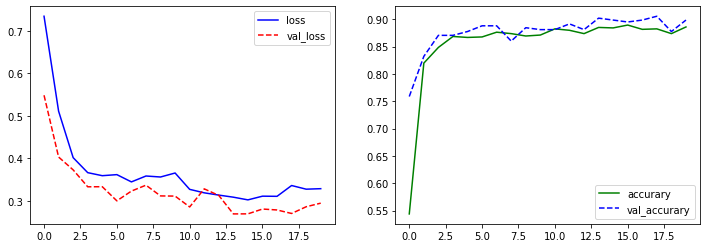

In [35]:
import matplotlib.pyplot as plt

def drawPlot(history):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], 'b', label="loss")
    plt.plot(history.history['val_loss'], 'r--', label="val_loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], 'g', label="accurary")
    plt.plot(history.history['val_accuracy'], 'b--', label="val_accurary")
    plt.legend()
    plt.show()
drawPlot(history)

## VGGNet으로 개와 고양이 분류
* Keggle Dataset

## Keggle

* 설치
    * `!pip install kaggle`
    
### Kaggle Dogs vs. Cats     
* https://www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'yourad'
os.environ['KAGGLE_KEY'] = 'xxxxxxxx'
!kaggle competitions download -c dogs-vs-cats

###### Unzip,  Directory 구성


In [6]:
import zipfile
import os
dir_path = 'cat_dog'

In [8]:
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

with zipfile.ZipFile("train.zip" , "r") as zip_ref:
    zip_ref.extractall(dir_path)

######  이미지 데이타 디렉토리 생성


In [16]:
sub_dirs = ['train', 'test']
label_dirs = ['cat', 'dog']
for sub_dir in sub_dirs:
    for label_dir in label_dirs:
        os.makedirs(os.path.join(dir_path, sub_dir, label_dir), exist_ok=True)
    

###### 준비된 디렉토리에 파일 복사
* test 디렉토리에 25% 할당

In [7]:
import glob
import random
import shutil

files = glob.glob(dir_path + '/train/*.jpg')
split_ratio = 0.25

for file in files:
    filename = os.path.basename(file)
    print('file copying...', file, end='\r')
    dst_dir = 'train'
    if random.random() < split_ratio :
        dst_dir = 'test'
    if filename.startswith('cat'):
        dst = os.path.join(dir_path, dst_dir, 'cat', filename)
    else :
        dst = os.path.join(dir_path, dst_dir, 'dog', filename)
    shutil.copyfile(file, dst)
print('copy done.')

copy done.


###### ImageGenerator 준비
* batch 미리 보기

Found 18840 images belonging to 2 classes.
Found 6160 images belonging to 2 classes.


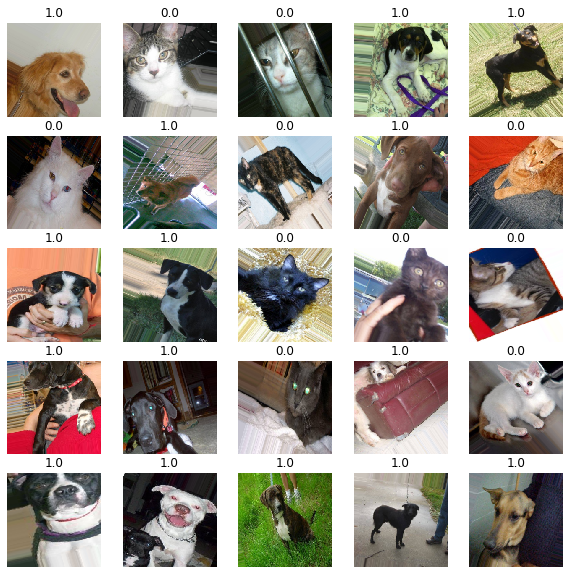

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

IMG_SIZE = 224
train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,
                                                     shear_range=0.2,
                                                     rotation_range=40,
                                                     zoom_range=0.2,
                                                     width_shift_range=0.2,
                                                     height_shift_range=0.2,
                                                     horizontal_flip=True,
                                                     vertical_flip=False)
test_img_gen =  tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_iter = train_img_gen.flow_from_directory(os.path.join(dir_path, 'train'),\
                                               batch_size=64, target_size=(IMG_SIZE, IMG_SIZE), class_mode='sparse')
test_iter = test_img_gen.flow_from_directory(os.path.join(dir_path, 'test'), \
                                             batch_size=64, target_size=(IMG_SIZE, IMG_SIZE), class_mode='sparse')


image_batch, label_batch = next(train_iter)

plt.figure(figsize=(10,10))
for n in range(25):
    plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(label_batch[n])
    plt.axis('off')



### Model 생성

In [ ]:
def make_VGGNet(input_shape=(224,224,3), output=1000):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(output, activation='softmax')
    ])
    return model

###### Model  학습

In [11]:
import os

dir_path = 'cat_dog'
IMG_SIZE = 227

model = make_VGGNet(input_shape=(IMG_SIZE, IMG_SIZE,3), output=2)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


epochs = 20
history = model.fit_generator(train_iter, steps_per_epoch=len(train_iter), 
                              validation_data=test_iter, validation_steps=len(test_iter),
                             epochs=epochs)

test_loss, test_acc = model.evaluate_generator(test_iter, steps=len(test_iter), verbose=0)
print("Test Accuracy:{}".format(test_acc))

# model save on Google Colab
model.save('drive/My Drive/vgg_cat_dog.h5')

drawPlot(history)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 227, 227, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 113, 113, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 113, 113, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 113, 113, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 128)      

KeyboardInterrupt: 

###### VGGNet 개,고양이 분류 테스트

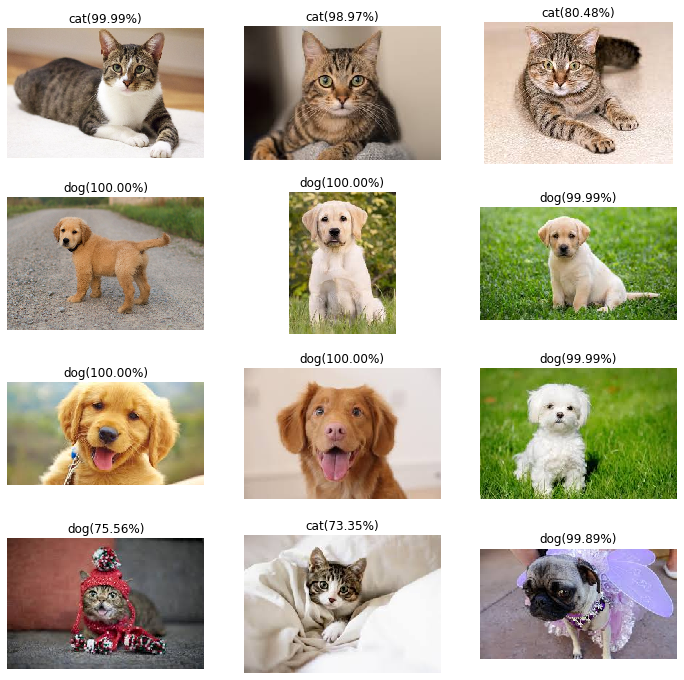

In [78]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

pet_dir = './img/pet/*.*'
labels = ['cat', 'dog']

model = tf.keras.models.load_model('drive/My Drive/vgg_cat_dog.h5')
paths =  glob.glob(pet_dir)
IMG_SIZE = 227
plt.figure(figsize=(12,12))
for i, path in enumerate(paths) :
    img = cv2.imread(path)[:,:,::-1]
    pet = img.copy().astype(np.float32)
    pet = cv2.resize(pet, (IMG_SIZE, IMG_SIZE))/255.0
    pet = np.expand_dims(pet, axis=0)

    pred = model.predict(pet)[0]
    label = tf.argmax(pred)
    pet_name =  labels[label.numpy()]
    
    plt.subplot(math.ceil(len(paths)/3), 3, i+1)
    plt.imshow(img)
    plt.title(f'{pet_name}({pred[label]*100:.2f}%)')
    plt.axis('off')